In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
import sys
sys.path.append("../")
from c_transform import c_transform
from jacobs import push_forward1
from push_forward import lap_solve

<IPython.core.display.Javascript object>


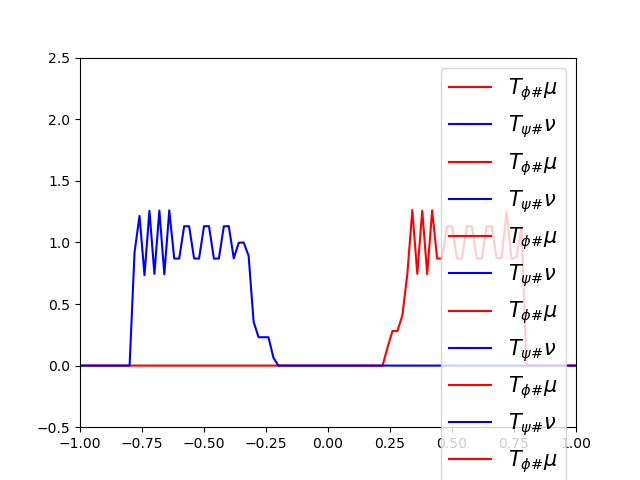

In [3]:
x = np.linspace(-1, 1, 101)
p = x

mu = np.where((x > 0.3) & (x < 0.8), 1., 0.)     #True: 1. False: 0.
nu = np.copy(mu[::-1])

"""
plt.plot(x, mu)
plt.plot(x, nu)
plt.show()
"""
phi = np.zeros_like(x)
psi = np.zeros_like(x)  

sigma = 1

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

h = x[1] - x[0]
"""
plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate 0')
plt.plot(x, mu,label=r'$\mu$')
plt.plot(x, nu,label=r'$\nu$')
plt.xlim(-1,1)
plt.ylim(-0.5,2.5) 
plt.legend(prop={'size': 15})
plt.show()
"""

fig, ax = plt.subplots()
artists = []


for k in range(50):
    
    phi_c, phi_iopt = c_transform(x, phi, p)
    phi += sigma * lap_solve(nu - push_forward1(mu, phi_c, h))
    psi, _ = c_transform(x, phi, p)                             #psi_{n + 1/2} = (phi_{n + 1/2})^c
    
    psi_c, psi_iopt = c_transform(x, psi, p)
    psi += sigma * lap_solve(mu - push_forward1(nu, psi_c, h))
    phi, _ = c_transform(x, psi, p)                             #phi_{n + 1} = (psi_{n + 1})^c
    
    title = ax.text(4.5, 1.15, 'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate {}'.format(str(k+1)))
    img1, = ax.plot(x, push_forward1(nu, psi_c, h), color='red',label=r'$T_{\phi \#} \mu$')
    img2, = ax.plot(x, push_forward1(mu, phi_c, h), color='blue', label=r'$T_{\psi \#} \nu$')
    
    if k % 1 == 0:
        ax.set_xlim(-1,1)
        ax.set_ylim(-0.5,2.5) 
        ax.legend(prop={'size': 15})
        artists.append([img1, img2, title])
    
ani = animation.ArtistAnimation(fig, artists, interval=100, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


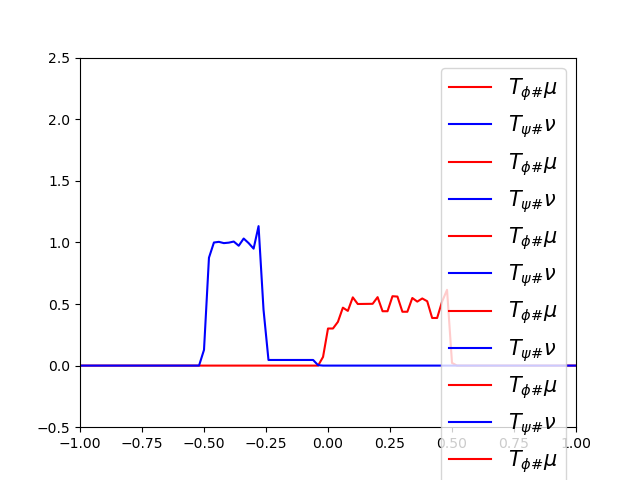

In [4]:
x = np.linspace(-1, 1, 101)
p = x

mu = np.where((x > 0.) & (x < 0.5), 0.5, 0.)     #True: 1. False: 0.
nu = np.where((x > -0.5) & (x < -0.25), 1., 0.)

"""
plt.plot(x, mu)
plt.plot(x, nu)
plt.show()
"""
phi = np.zeros_like(x)
psi = np.zeros_like(x)  

sigma = 1

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

h = x[1] - x[0]
"""
plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate 0')
plt.plot(x, mu,label=r'$\mu$')
plt.plot(x, nu,label=r'$\nu$')
plt.xlim(-1,1)
plt.ylim(-0.5,2.5) 
plt.legend(prop={'size': 15})
plt.show()
"""

fig, ax = plt.subplots()
artists = []


for k in range(50):
    phi_c, phi_iopt = c_transform(x, phi, p)
    phi += sigma * lap_solve(nu - push_forward1(mu, phi_c, h))
    psi, _ = c_transform(x, phi, p)                             #psi_{n + 1/2} = (phi_{n + 1/2})^c
    
    psi_c, psi_iopt = c_transform(x, psi, p)
    psi += sigma * lap_solve(mu - push_forward1(nu, psi_c, h))
    phi, _ = c_transform(x, psi, p)                             #phi_{n + 1} = (psi_{n + 1})^c
    
    title = ax.text(4.5, 1.15, 'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate {}'.format(str(k+1)))
    img1, = ax.plot(x, push_forward1(nu, psi_c, h), color='red',label=r'$T_{\phi \#} \mu$')
    img2, = ax.plot(x, push_forward1(mu, phi_c, h), color='blue', label=r'$T_{\psi \#} \nu$')
    
    if k % 1 == 0:
        ax.set_xlim(-1,1)
        ax.set_ylim(-0.5,2.5) 
        ax.legend(prop={'size': 15})
        artists.append([img1, img2, title])
    
ani = animation.ArtistAnimation(fig, artists, interval=100, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


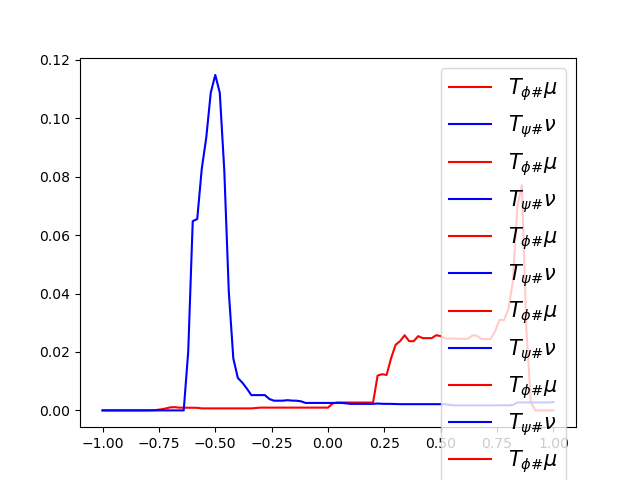

In [5]:
x = np.linspace(-1, 1, 101)
p = x

mu = np.where(x > 0.2, 1., 0.)     #True: 1. False: 0.
mu /= np.sum(mu)                   # mu = mu / np.sum(mu)
nu = np.exp(-(x + 0.5)**2 * 100)
nu /= np.sum(nu) 
"""
plt.plot(x, mu)
plt.plot(x, nu)
plt.show()
"""
phi = np.zeros_like(x)
psi = np.zeros_like(x)  

sigma = 1

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

h = x[1] - x[0]
"""
plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate 0')
plt.plot(x, mu,label=r'$\mu$')
plt.plot(x, nu,label=r'$\nu$')
plt.xlim(-1,1)
plt.ylim(-0.5,2.5) 
plt.legend(prop={'size': 15})
plt.show()
"""

fig, ax = plt.subplots()
artists = []


for k in range(300):
    phi_c, phi_iopt = c_transform(x, phi, p)
    phi += sigma * lap_solve(nu - push_forward1(mu, phi_c, h))
    psi, _ = c_transform(x, phi, p)                             #psi_{n + 1/2} = (phi_{n + 1/2})^c
    
    psi_c, psi_iopt = c_transform(x, psi, p)
    psi += sigma * lap_solve(mu - push_forward1(nu, psi_c, h))
    phi, _ = c_transform(x, psi, p)                             #phi_{n + 1} = (psi_{n + 1})^c
    
    title = ax.text(4.5, 1.15, 'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate {}'.format(str(k+1)))
    img1, = ax.plot(x, push_forward1(nu, psi_c, h), color='red',label=r'$T_{\phi \#} \mu$')
    img2, = ax.plot(x, push_forward1(mu, phi_c, h), color='blue', label=r'$T_{\psi \#} \nu$')
    
    if k % 1 == 0:
        ax.legend(prop={'size': 15})
        artists.append([img1, img2, title])
    
ani = animation.ArtistAnimation(fig, artists, interval=2, repeat=False, blit=True)
plt.show()

<IPython.core.display.Javascript object>


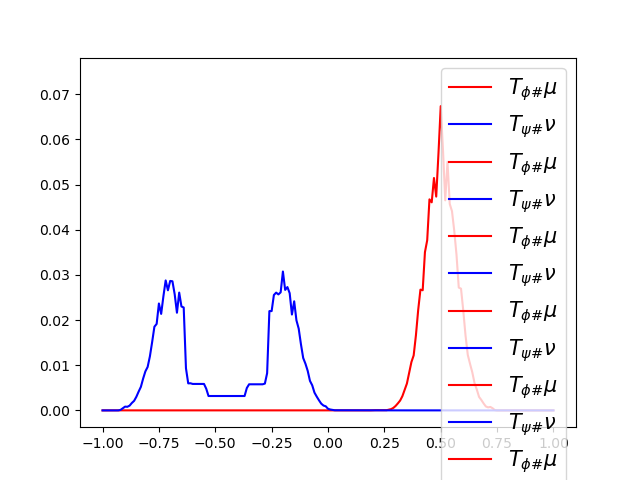

In [15]:
x = np.linspace(-1, 1, 201)
p = x

mu = np.exp(-(x - 0.5)**2 * 100)   #e^(-(x-0.5)^2 * 100)    #True: 1. False: 0.
mu /= np.sum(mu)                   # mu = mu / np.sum(mu)
nu = np.exp(-(x + 0.2)**2 * 100) + np.exp(-(x+0.7)**2 * 100)
nu /= np.sum(nu) 
"""
plt.plot(x, mu)
plt.plot(x, nu)
plt.show()
"""
phi = np.zeros_like(x)
psi = np.zeros_like(x)  

sigma = 100

phi_iopt = np.arange(len(x))
psi_iopt = np.arange(len(x))

h = x[1] - x[0]
"""
plt.title(r'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate 0')
plt.plot(x, mu,label=r'$\mu$')
plt.plot(x, nu,label=r'$\nu$')
plt.xlim(-1,1)
plt.ylim(-0.5,2.5) 
plt.legend(prop={'size': 15})
plt.show()
"""

fig, ax = plt.subplots()
artists = []


for k in range(300):
    phi_c, phi_iopt = c_transform(x, phi, p)
    phi += sigma * lap_solve(nu - push_forward1(mu, phi_c, h))
    psi, _ = c_transform(x, phi, p)                             #psi_{n + 1/2} = (phi_{n + 1/2})^c
    
    psi_c, psi_iopt = c_transform(x, psi, p)
    psi += sigma * lap_solve(mu - push_forward1(nu, psi_c, h))
    phi, _ = c_transform(x, psi, p)                             #phi_{n + 1} = (psi_{n + 1})^c
    
    title = ax.text(4.5, 1.15, 'back-and-forth update $\mu$ and $\nu$. Example 2:  Iterate {}'.format(str(k+1)))
    img1, = ax.plot(x, push_forward1(nu, psi_c, h), color='red',label=r'$T_{\phi \#} \mu$')
    img2, = ax.plot(x, push_forward1(mu, phi_c, h), color='blue', label=r'$T_{\psi \#} \nu$')
    
    if k % 1 == 0:
        ax.legend(prop={'size': 15})
        artists.append([img1, img2, title])
    
ani = animation.ArtistAnimation(fig, artists, interval=2, repeat_delay=1000)
plt.show()